# Les 1 - 10 november 2022

## Introductie

Deze eerste opdracht maakt gebruik van twee bestanden in CSV vorm. De bestanden geven informatie over gebruikers van de Fitbit en het aantal stappen dat zij per dag zetten. 

In dit document zal ik allereerst de data inladen en samenvoegen, waarna ik deze zal opschonen. Ook zal ik de gemiddelde per persoon berekenen over het aantal stappen. Als laatste zal ik een aantal visuele weergaven maken.

## Data cleaning

### Read in and merge the two data sets (tip: think of different CSV formats that exist)

Om te kunnen werken met de bestanden, zal ik deze allereerst moeten inladen. Dit zal ik hieronder doen.

In [3]:
# Ik begin met het importeren van de bibliotheken die ik nodig zal hebben.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daarna ga ik de twee bestanden inladen, dit doe ik door het commando "pd.read".
steps = pd.read_csv("steps.csv", sep = ";")
survey = pd.read_csv("survey.csv")

De bestanden zijn nu ingeladen, om gemakkelijk te kunnen werken zal ik deze samen moeten voegen tot één bestand. 
Om dit te kunnen doen, moet ik eerst weten welke variabele ik kan gebruiken om ze te koppelen. Ik ga daarvoor eerst beide bekijken.

In [4]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
steps.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,24.000000,243.000000,278.000000,296.000000,354.000000,353.000000,328.000000,380.000000,419.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,8690.810198,8362.570122,8261.913158,9231.391408,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,4843.885824,5762.374515,4325.239676,5282.031304,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,164.000000,67.000000,25.000000,43.000000,11.000000,154.000000,7.000000,4.000000,9.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,5212.000000,4496.000000,5261.250000,5679.000000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,8299.000000,7638.000000,8147.000000,8844.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,11386.000000,11910.000000,11000.000000,12140.500000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


In [6]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [7]:
survey.describe()

,id,hh_size,education,height,weight
count,929.000000,929.000000,929.000000,928.000000,927.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873
std,268.323499,1.226129,1.274491,9.080235,25.902717
min,1.000000,1.000000,1.000000,145.000000,6.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000
50%,465.000000,2.000000,2.000000,172.000000,71.000000
75%,697.000000,3.000000,4.000000,179.000000,81.000000
max,929.000000,11.000000,5.000000,195.000000,700.000000


Ik zie nu dat beide files evenveel regels bevatten. Ik zie geen kolommen die overeen komen, dus ik ga ze koppelen op basis van id nummer. Dit ga ik doen door middel van het merge commando.

In [8]:
merged = survey.merge(steps, on="id")

### Clean the data: remove impossible values

Tijdens het kijken naar de waarden heb ik tevens gekeken naar of alle waarden plausibel zijn, een minimale lengte van 145 cm en een maximale lengte van 195 cm klinken voor mij als redelijk, hier zal ik dus niks aan doen.
Als ik echter kijk naar het minimale gewicht is dit 6 kilogram, ik vind dit niet realistisch. Ik heb op internet opgezocht wat het minimale gewicht is voor iemand van 145 cm en dit zou 36 kilogram zijn, alle waarden hieronder wil ik verwijderen.
Het maximale gewicht is nu 700 kilogram, ook dit is niet realistisch. Voor iemand van 195 cm vind ik 200 kilogram maximaal, dus ook de waarden hierboven zal ik gaan verwijderen.

In [9]:
merged = merged[(merged["weight"] < 200) & (merged["weight"] > 36)]

Ik wil nu graag weten hoeveel regels ik nu nog over heb, dus ik bekijk het bestand nogmaals door middel van de describe functie.

In [10]:
merged.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,924.000000,924.000000,924.000000,923.000000,924.000000,24.000000,240.000000,275.000000,294.000000,351.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,464.225108,2.339827,2.525974,171.725894,72.284632,3642.416667,9018.937500,10880.509091,7409.537415,8082.786325,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,267.681497,1.226864,1.273267,9.055364,15.453637,3951.910368,6444.654214,6290.354387,6744.108645,5475.644970,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,37.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,232.750000,1.000000,1.000000,165.000000,61.000000,299.500000,4364.000000,6537.500000,2761.500000,4428.000000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,464.500000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,695.250000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14237.500000,10447.250000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,155.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


In [11]:
merged.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 

Nu wil ik de gemiddelde aantal stappen per persoon berekenen. De persoon is het ID nummer en het gemiddelde aantal stappen zijn alle kolommen die na weight komen. Ook moet ik rekening houden met de NaN waarden. 

Ik ga beginnen met het selecteren van de kolommen waarin de stappen staan. Dit doe ik door een slicer te creeëren. Vervolgens bereken ik van die waarden de gemiddele per regel, door de axis een 1 te geven. Hierdoor wordt de gemiddelde berekend over de rijen.

In [12]:
slicer = pd.IndexSlice
merged2 = merged.loc[:,slicer["20-6-2013":"13-5-2014"]]

x = merged2.mean(axis = 1)
print(x)

0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
924     6282.131868
925     4799.880000
926    10030.326829
927    15679.679012
928     7584.467153
Length: 924, dtype: float64


Nu ga ik een dataframe creeëren waarin alle losse dagen weg zijn, zodat ik een overzichtelijk dataframe heb.

In [13]:
merged_mean = merged.loc[:,slicer["id":"weight"]]
merged_mean.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


De laatste stap is het toevoegen van de kolom met gemiddelden aan de dataframe die ik zojuist heb aangemaakt.

In [14]:
merged_mean['mean'] = x

### Show the head() of the resulting data frame

In [15]:
merged_mean.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


## Verkennende data-analyse

### An analysis of mean steps per participant:

#### Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)

Ik ga een histogram maken waarin te zien is hoe de gemiddelde stappen per dag verdeeld zijn. In de oorspronkelijke dataframe heb ik geen rijen verwijderd op basis van extreem veel stappen, omdat er omstandigheden kunnen zijn waardoor dit wel kan. Echter kan ik met maximale waarden van 200.000 stappen gemiddeld per dag geen goede weergave kan maken. Daarom verwijder ik voor nu alle waarden boven de 40.000 stappen.

In [16]:
merged_mean = merged_mean[(merged_mean["mean"] < 40000)]

(array([ 64., 373., 313., 127.,  26.,  10.,   2.,   1.,   0.,   1.]),
 array([4.00000000e+00, 3.04098089e+03, 6.07796178e+03, 9.11494268e+03,
        1.21519236e+04, 1.51889045e+04, 1.82258854e+04, 2.12628662e+04,
        2.42998471e+04, 2.73368280e+04, 3.03738089e+04]),
 <BarContainer object of 10 artists>)

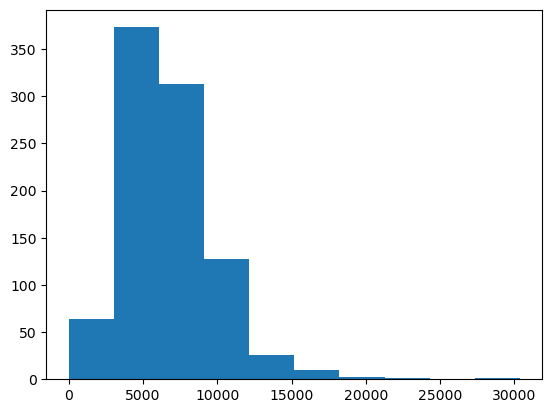

In [17]:
plt.hist(merged_mean['mean'])

#### Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

Als eerste kan het dataframe worden bekeken met het describe commando, deze geeft een aantal belangrijke gegevens weer, zoals count, gemiddelde, minimum en maximum.

In [18]:
merged_mean.describe()

,id,hh_size,education,height,weight,mean
count,917.000000,917.000000,917.000000,916.000000,917.000000,917.000000
mean,464.317339,2.334787,2.520174,171.764192,72.300981,6712.828347
std,267.422181,1.224843,1.271486,9.068957,15.464953,3029.968716
min,1.000000,1.000000,1.000000,145.000000,37.000000,4.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000,4632.646552
50%,464.000000,2.000000,2.000000,172.000000,71.000000,6240.073034
75%,695.000000,3.000000,4.000000,179.000000,81.000000,8327.528037
max,929.000000,11.000000,5.000000,195.000000,155.000000,30373.808917


#### Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

In de bovenstaande beschrijving is te zien dat het dataframe bestaat uit 924 regels. De gemiddelde mens in de dataframe is ongeveer 171 cm lang, weegt ongeveer 72 kilogram en loopt gemiddeld 7021 stappen per dag. Tussen 25 en 75 procent zijn mensen tussen de 165 en 179 cm lang, dit houdt dus in dat er in verhouding weinig mensen zijn die 145 cm of 195 cm zijn. Dit zijn outliers. Ditzelfde geldt voor het gewicht van 155 kg en 37 kg. Er zullen weinig mensen zijn die dit gewicht hebben, waardoor deze niet binnen de 25 en 75 procent vallen. De standaarddeviatie van de hoogten is 9.055, dit geeft aan hoeveel de waarden afwijken van het gemiddelde. En standaarddeviatie van 9.055 voor lengte is dus vrij klein, dit betekend dat alle waarden redelijk dicht bij elkaar liggen. De standaarddeviatie van gewicht is al groter, namelijk 15.45. De standaarddeviatie van de gemiddelde stappen is echter nog groter, met 7406.69 is de spreiding hierin zeer groot.

### The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)

#### Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.

Ik ga het commanco pairplot gebruiken om een scatterplot te krijgen van alle variabelen, ik kan hiermee zien of er relaties bestaan tussen alle variabelen.

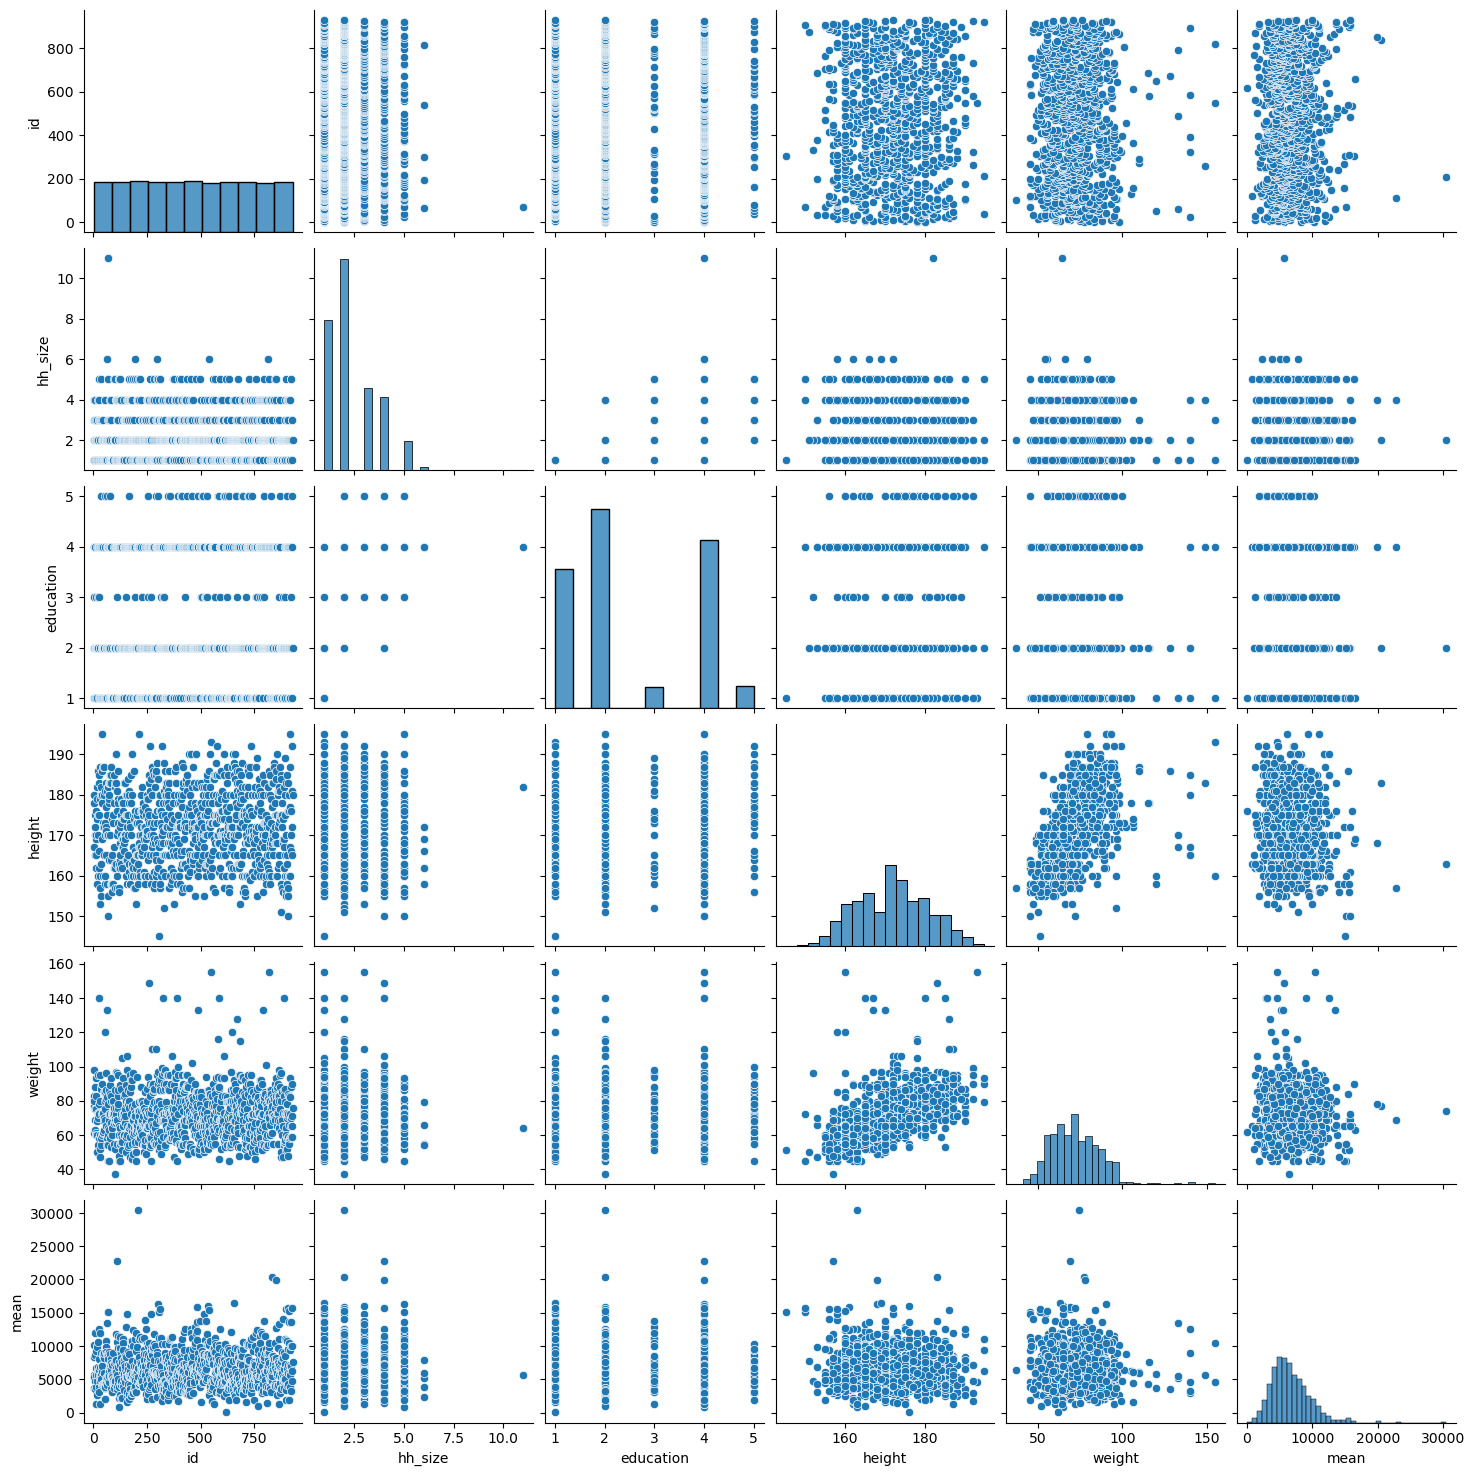

In [19]:
sns.pairplot(merged_mean)
plt.show()

Nu ga ik de correlaties hiervan berekenen:

In [20]:
merged_mean.corr()

,id,hh_size,education,height,weight,mean
id,1.000000,-0.014510,-0.000874,0.028040,0.011452,0.024978
hh_size,-0.014510,1.000000,0.825281,-0.050416,0.006547,0.033554
education,-0.000874,0.825281,1.000000,-0.033492,0.010128,0.012120
height,0.028040,-0.050416,-0.033492,1.000000,0.510307,-0.082438
weight,0.011452,0.006547,0.010128,0.510307,1.000000,-0.059830
mean,0.024978,0.033554,0.012120,-0.082438,-0.059830,1.000000


#### Describe and interpret the results

Uit bovenstaande weergaven kan ik opmaken dat er weinig relaties bestaan tussen de nummerieke variabalen. De enige variabelen die enige correlatie laten zien, zijn lengte en gewicht (hoe langer, hoe zwaarder).

## Voorspellend model

### Explain linear regression in your own words

Lineaire regressie gaat over een verband dat bestaat tussen twee variabelen, zoals de temperatuur in verhouding tot het aantal ijsjes dat er verkocht worden. Er is altijd sprake van een onafhankelijke (x-as) en een afhankelijke (y-as) variabele. Uit dit verband ontstaat een formule, waarmee uiteindelijk ook voorspellingen worden gedaan over toekomstige gebeurtenissen. Hoe sterker de relatie, hoe betrouwbaarder de voorspelling.

### Fit a linear regression model to predict the mean steps per participant, using the training data. Extra challenge: see if you can find out how to include the categorical variables, such as gender.

Allereerst ga ik twee bibliotheken importeren die ik nodig zal hebben om de regressie weer te geven.

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

Nu ga ik de tabel bekijken met daarin een lijn die de regressie weergeeft.

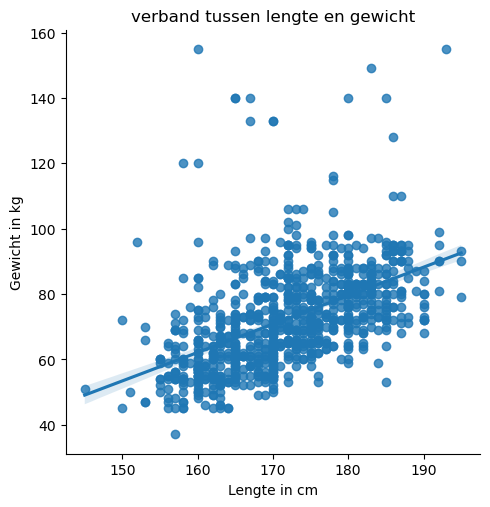

In [23]:
sns.lmplot(x='height', y='weight', data=merged_mean)
plt.xlabel('Lengte in cm')
plt.ylabel('Gewicht in kg')
plt.title('verband tussen lengte en gewicht')
plt.show()

Vervolgens ga ik het model fitten, dit doe ik met onderstaande code:

In [31]:
survey_1 = survey.dropna()
x = survey_1[['height']] 
y = survey_1['weight']
lm = LinearRegression()
lm = lm.fit(x, y)

## Evaluation

### Evaluate the model

#### Predictive power of the model (R2, RMSE)

De volgende stap is dat ik de waarden ga voorspellen, met de ingebouwde predict functie.

In [ ]:
merged_mean['mean'] = lm.predict(x)
merged_mean.head(10)

### Describe and interpret the results

Het model toont niet voldoende verband om goede voorspellingen te kunnen doen.

## Conclusion

Met behulp van lineaire regressie kunnen verbanden worden gelegd en aan de hand daarvan kunnen voorspellingen worden gedaan over de tijd. De dataset in deze opdracht bevat gegevens uit de database van Fitbit. Gebruikers en het aantal stappen dat zij per dag zetten zijn verzameld en heb ik in dit bestand samengevoegd. Hier heb ik een aantal bewerkingen op uitgevoerd en heb ik uiteindelijk geprobeerd hier regressie in te vinden.
Echter is de conclusie van deze opdracht dat er in de database helaas geen regressie bestaat. De relatie tussen de lengte en het gewicht toont matige regressie, echter is deze slechts 0.51 en komt daarvoor niet in aanmerking om echt over correlatie te spreken.